In [4]:
# Importing relevant libraries
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib as plt
from scipy.optimize import curve_fit
import wordcloud as wc
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Loading dataset to dataframe
ec = pd.read_csv('.\EC.csv')

## Preliminary Analysis

In [6]:
#size of our dataset
print('There are {} rows and {} columns in the dataset'.format(ec.shape[0],ec.shape[1]))

There are 1176 rows and 10 columns in the dataset


In [7]:
# Top 5 values from dataframe to get information about structure of dataset
ec.head()

,Actor1Code,Actor1Name,Actor1Geo_ADM1Code,Actor2Code,Actor2Name,Actor2Geo_ADM1Code,ActionGeo_FullName,ActionGeo_ADM1Code,Year,SQLDATE
0,ALB,ALBANIAN,AL,MKD,MACEDONIAN,AL,Albania,AL,2001,20010301
1,RWA,RWANDA,RW,NaN,NaN,NaN,Rwanda,RW,2001,20011031
2,MIL,PARAMILITARY,US,NaN,NaN,NaN,United States,US,2001,20010712
3,CVL,VILLAGE,AL46,NaN,NaN,NaN,"Varvare, Qarku Korce, Albania",AL46,2001,20010726
4,CVL,POPULATION,AL,ALB,ALBANIAN,AL,"Belgrade, Serbia (general),",RB00,2001,20010304


In [10]:
# General information about columns in dataframe
print('There are total {} columns and name of columns names are \n{}'.format(len(list(ec.columns)), ec.columns))

There are total 10 columns and name of columns names are 
Index(['Actor1Code', 'Actor1Name', 'Actor1Geo_ADM1Code', 'Actor2Code',
       'Actor2Name', 'Actor2Geo_ADM1Code', 'ActionGeo_FullName',
       'ActionGeo_ADM1Code', 'Year', 'SQLDATE'],
      dtype='object')


In [11]:
# Basic information about dataframe: number of non null values, data type of columns
ec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Actor1Code          1145 non-null   object
 1   Actor1Name          1145 non-null   object
 2   Actor1Geo_ADM1Code  1143 non-null   object
 3   Actor2Code          690 non-null    object
 4   Actor2Name          690 non-null    object
 5   Actor2Geo_ADM1Code  690 non-null    object
 6   ActionGeo_FullName  1093 non-null   object
 7   ActionGeo_ADM1Code  1174 non-null   object
 8   Year                1176 non-null   int64 
 9   SQLDATE             1176 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 92.0+ KB


In [14]:
# Percentage of null values columnwise
nulls_percent = (ec.isnull().sum().sort_values()*100 / len(ec)).to_frame()
nulls_percent

,0
Year,0.000000
SQLDATE,0.000000
ActionGeo_ADM1Code,0.170068
Actor1Code,2.636054
Actor1Name,2.636054
Actor1Geo_ADM1Code,2.806122
ActionGeo_FullName,7.057823
Actor2Code,41.326531
Actor2Name,41.326531
Actor2Geo_ADM1Code,41.326531


## Plotting relevant columns depicting dynamics

In [15]:
# total number of ethnic conflicts happening at a particular location
number_loc = ec.ActionGeo_FullName.value_counts()
number_loc = number_loc.to_frame().reset_index().rename(columns={'index':'location','ActionGeo_FullName':'frequency'})
number_loc

,location,frequency
0,Albania,133
1,"Belgrade, Serbia (general),",72
2,"Skopje, Macedonia (general), Macedonia",47
3,Croatia,37
4,Israel,36
...,...,...
256,"Vejce, Macedonia (general), Macedonia",1
257,"Korita, Berat, Albania",1
258,"Barda Rash, NinawáZ, Iraq",1
259,"Likovo, Moskovskaya Oblast', Russia",1


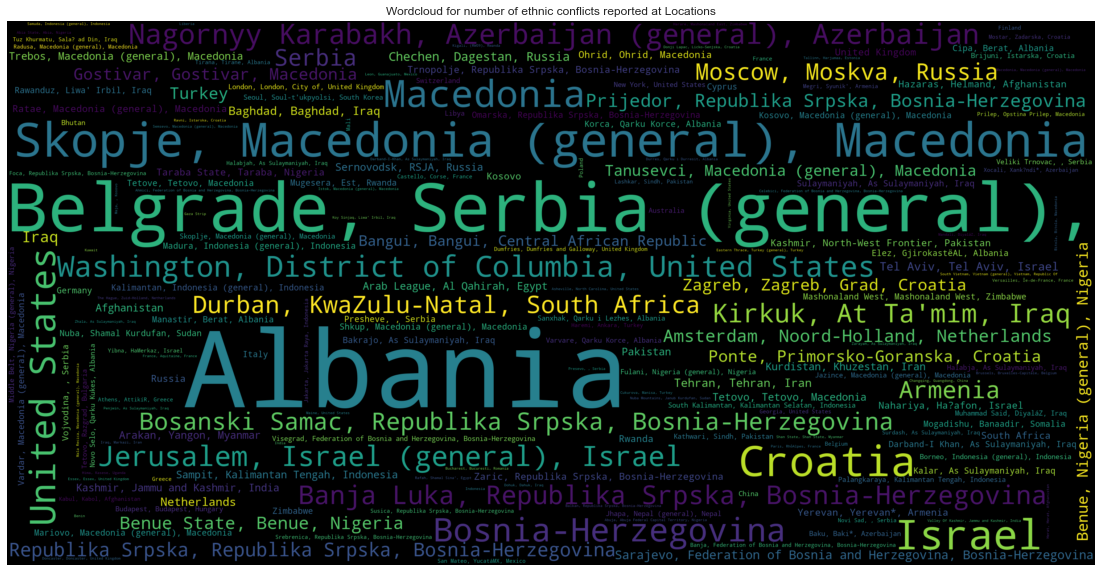

In [16]:
# wordplot for locations (based on number of incidents of ethnic conflicts)
d = dict(number_loc.values)
wordcloud = wc.WordCloud(width = 3000, height = 1500)
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Wordcloud for number of ethnic conflicts reported at Locations')
plt.show()

[Text(0.5, 0, 'Number of cases of ethnic conflicts'), Text(0, 0.5, 'Location')]

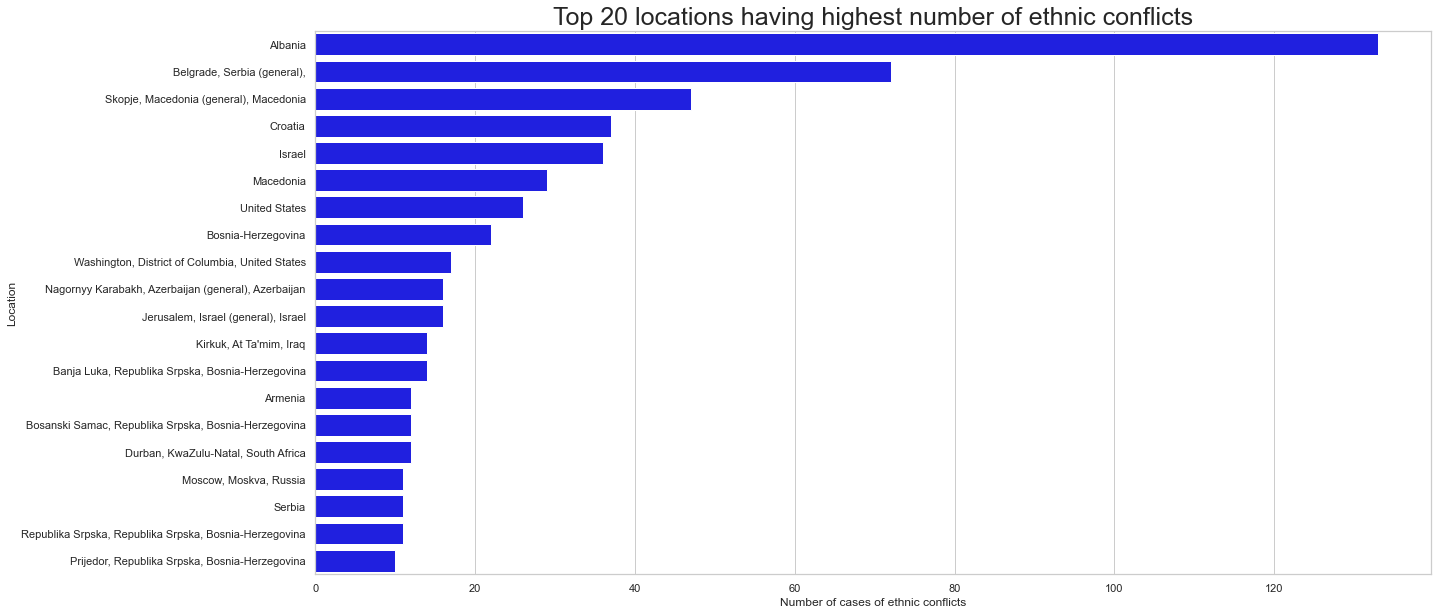

In [17]:
# top 20 countries having most incidents of ethnic conflicts
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20,10))
plt.title('Top 20 locations having highest number of ethnic conflicts', fontsize=25)
ax = sns.barplot(x='frequency', y='location',data=number_loc.head(20), orient='h', color='blue')
ax.set(xlabel='Number of cases of ethnic conflicts', ylabel='Location')

[Text(0.5, 0, 'n cases of ethnic conflicts'),
 Text(0, 0.5, 'Number of locations with n cases of ethnic conflicts')]

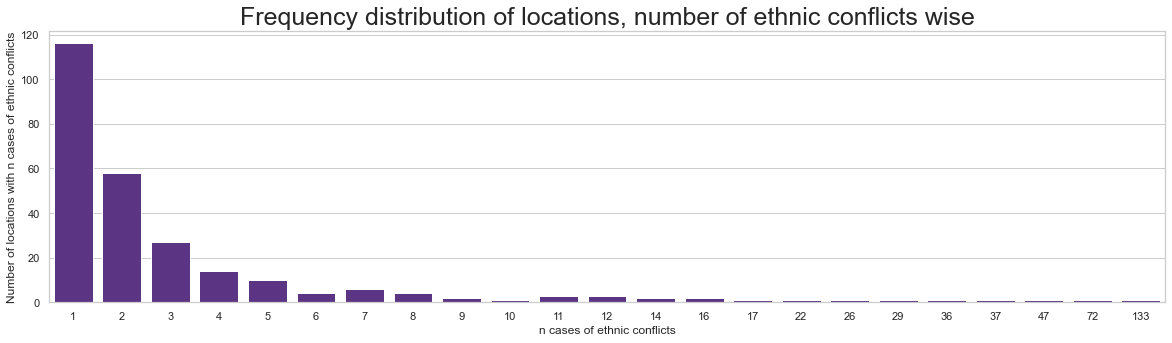

In [18]:
# count of countries having n ethnic conflicts in year 2001
plt.figure(figsize=(20,5))
plt.title('Frequency distribution of locations, number of ethnic conflicts wise', fontsize=25)
ax = sns.countplot(x='frequency', data=number_loc, orient='h', color='#5c2791')
ax.set(xlabel='n cases of ethnic conflicts', ylabel='Number of locations with n cases of ethnic conflicts')

In [20]:
# Actor1Name as source
src = ec.Actor1Name.value_counts()
src = src.to_frame().reset_index().rename(columns={'index':'source','Actor1Name':'frequency'})
# Actor2Name as target
tgt = ec.Actor2Name.value_counts()
tgt = tgt.to_frame().reset_index().rename(columns={'index':'target','Actor2Name':'frequency'})
# Actor1Name and Actor2Name as common actors
comn = {}

for i,j in zip(list(src.source),list(src.frequency)):
    if i not in comn:
        comn[i] = int(j)
for i,j in zip(list(tgt.target),list(tgt.frequency)):
    if i not in comn:
        comn[i] = int(j)
    else:
        comn[i] = int(j) + comn.get(i)

comn = {'actors':list(comn.keys()),'frequency':list(comn.values())}
comn = pd.DataFrame.from_dict(comn)

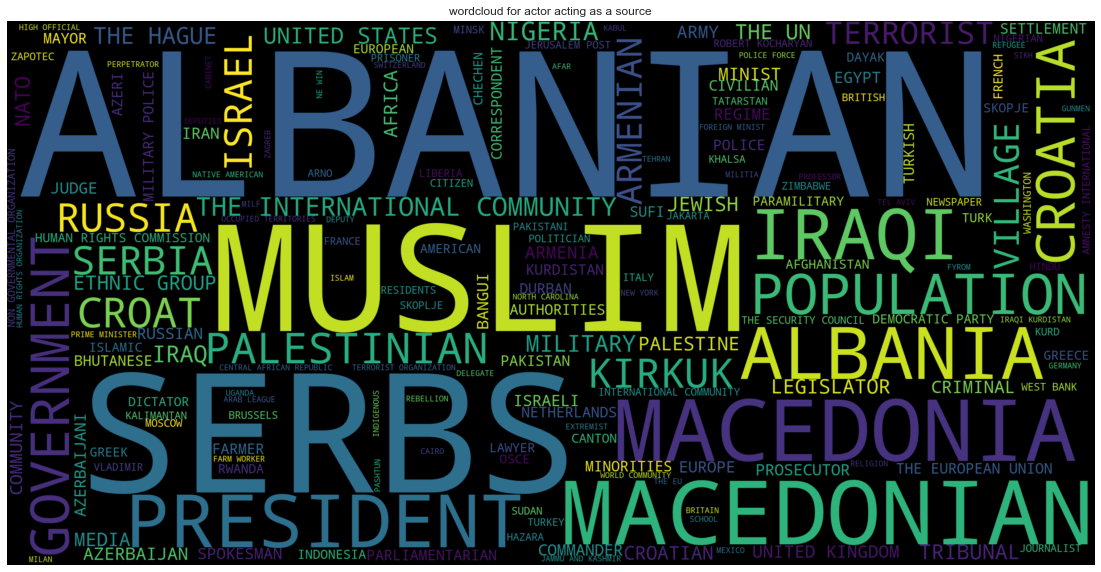

In [21]:
# wordplot for actors involved in ethnic conflicts as source
d = dict(src.values)
wordcloud = wc.WordCloud(width = 3000, height = 1500)
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('wordcloud for actor acting as a source')
plt.show()

[Text(0.5, 0, 'Number of cases of ethnic conflicts actor is involved as source'),
 Text(0, 0.5, 'Name of actor')]

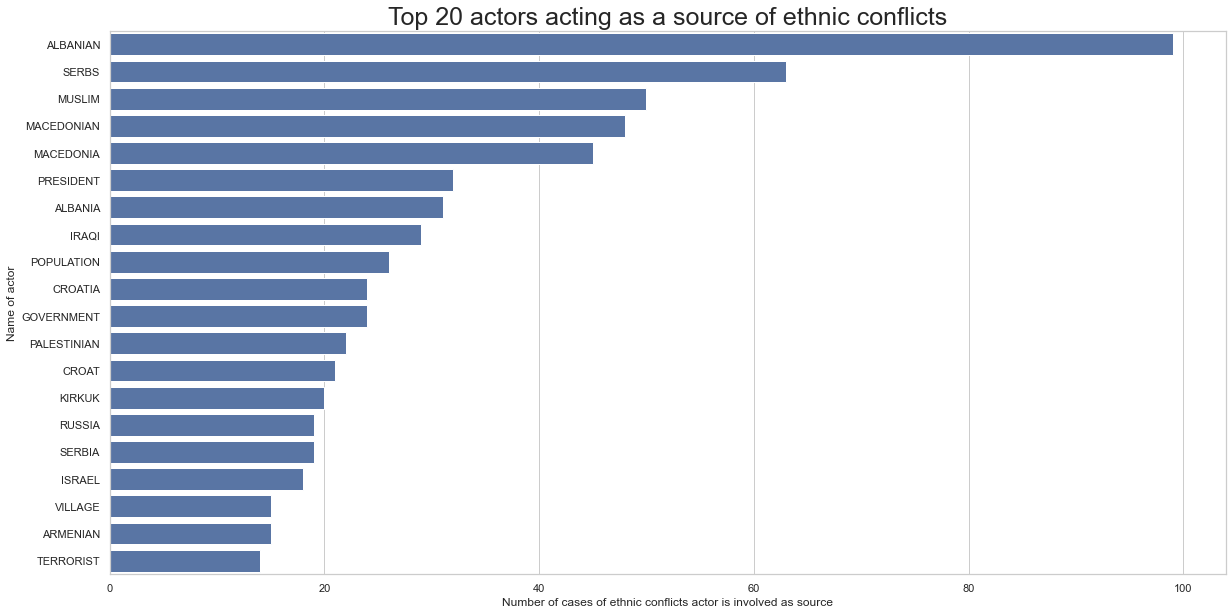

In [23]:
# Top 20 actors acting as a source of ethnic conflicts
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20,10))
plt.title('Top 20 actors acting as a source of ethnic conflicts', fontsize=25)
ax = sns.barplot(x='frequency', y='source',data=src.head(20), orient='h', color='b')
ax.set(xlabel='Number of cases of ethnic conflicts actor is involved as source', ylabel='Name of actor')

[Text(0.5, 0, 'Actor acting as source in n cases of ethnic conflicts'),
 Text(0, 0.5, 'Frequency')]

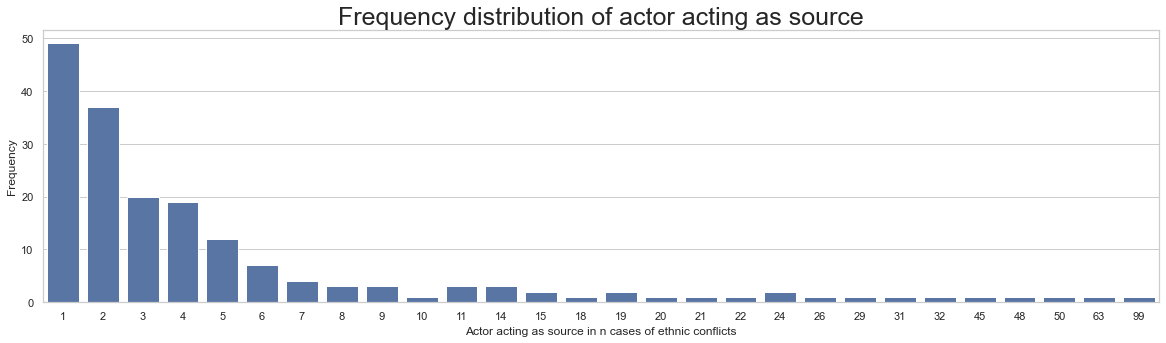

In [22]:
# Frequency distribution of actor acting as source
plt.figure(figsize=(20,5))
plt.title('Frequency distribution of actor acting as source', fontsize=25)
ax = sns.countplot(x='frequency', data=src, orient='h', color='b')
ax.set(xlabel='Actor acting as source in n cases of ethnic conflicts', ylabel='Frequency')

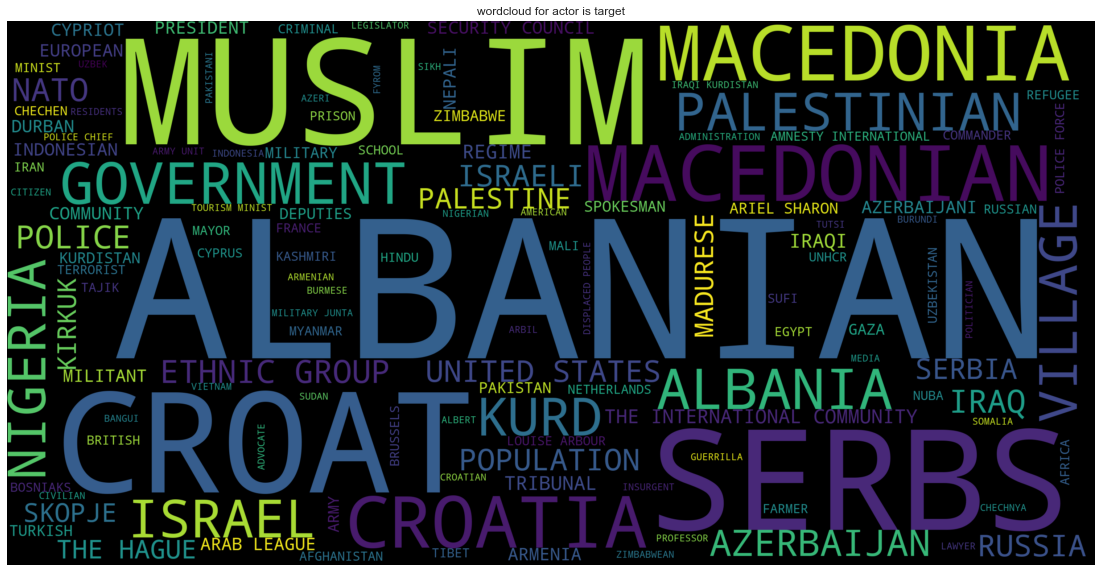

In [24]:
# wordplot for actors involved in ethnic conflicts as target
d = dict(tgt.values)
wordcloud = wc.WordCloud(width = 3000, height = 1500)
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('wordcloud for actor is target')
plt.show()

[Text(0.5, 0, 'Number of cases of ethnic conflicts actor is involved as target'),
 Text(0, 0.5, 'Name of actor')]

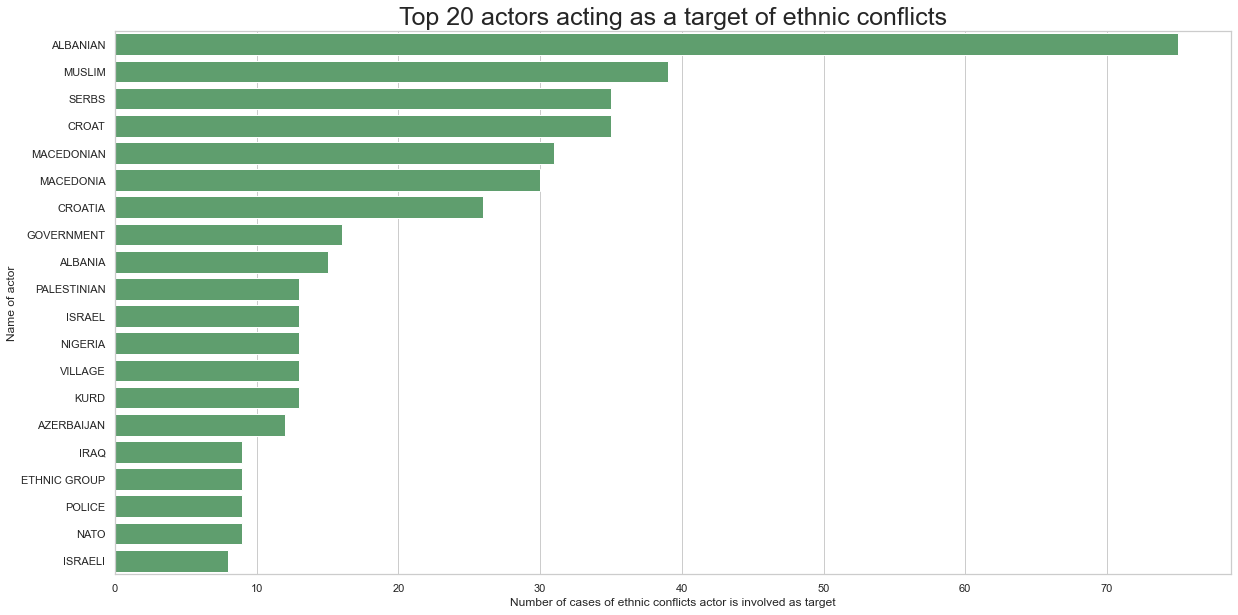

In [25]:
# Top 20 actors acting as a target of ethnic conflicts
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20,10))
plt.title('Top 20 actors acting as a target of ethnic conflicts', fontsize=25)
ax = sns.barplot(x='frequency', y='target',data=tgt.head(20), orient='h', color='g')
ax.set(xlabel='Number of cases of ethnic conflicts actor is involved as target', ylabel='Name of actor')

[Text(0.5, 0, 'Actor acting as target in n cases of ethnic conflicts'),
 Text(0, 0.5, 'Frequency')]

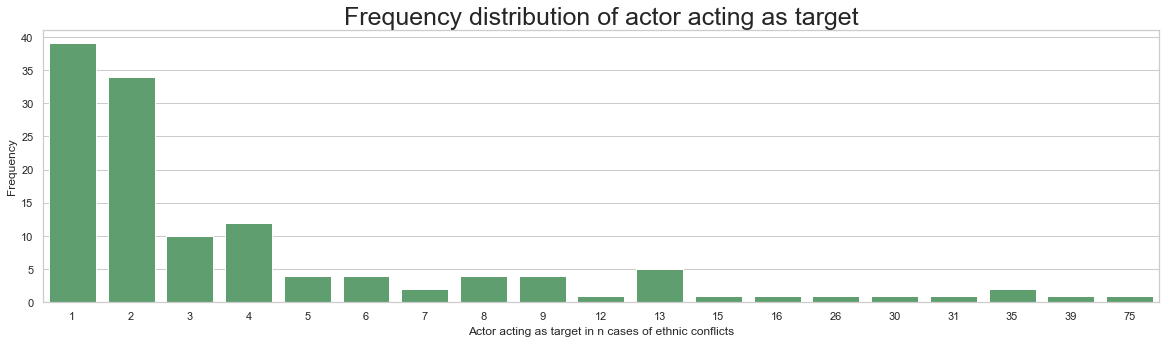

In [26]:
# Frequency distribution of actor acting as target
plt.figure(figsize=(20,5))
plt.title('Frequency distribution of actor acting as target', fontsize=25)
ax = sns.countplot(x='frequency', data=tgt, orient='h', color='g')
ax.set(xlabel='Actor acting as target in n cases of ethnic conflicts', ylabel='Frequency')

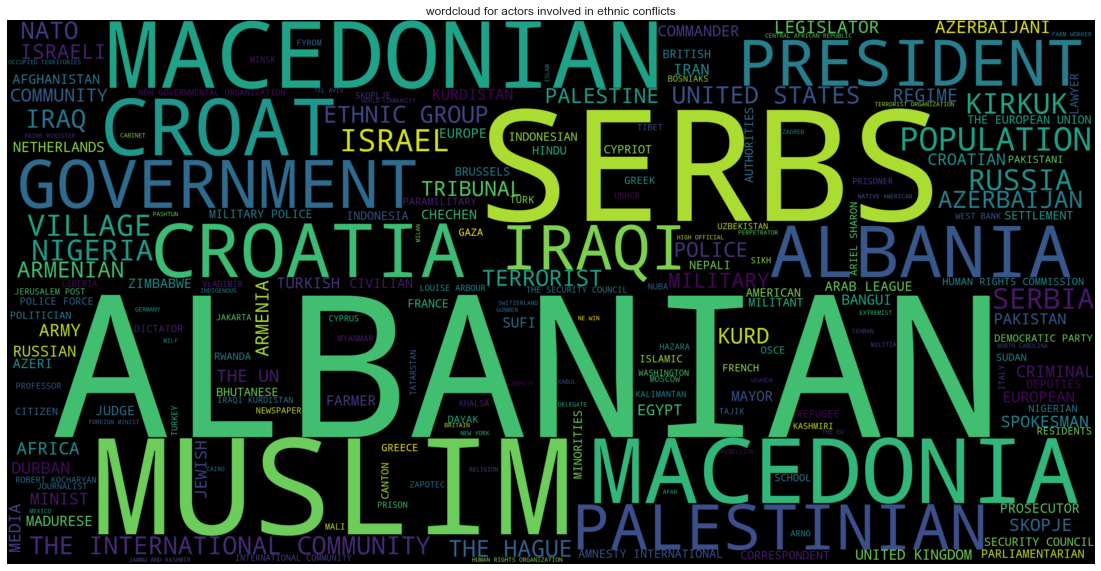

In [27]:
# wordplot for actors involved in ethnic conflicts
d = dict(comn.values)
wordcloud = wc.WordCloud(width = 3000, height = 1500)
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('wordcloud for actors involved in ethnic conflicts')
plt.show()

[Text(0.5, 0, 'Number of cases of ethnic conflicts actor is involved'),
 Text(0, 0.5, 'Name of actor')]

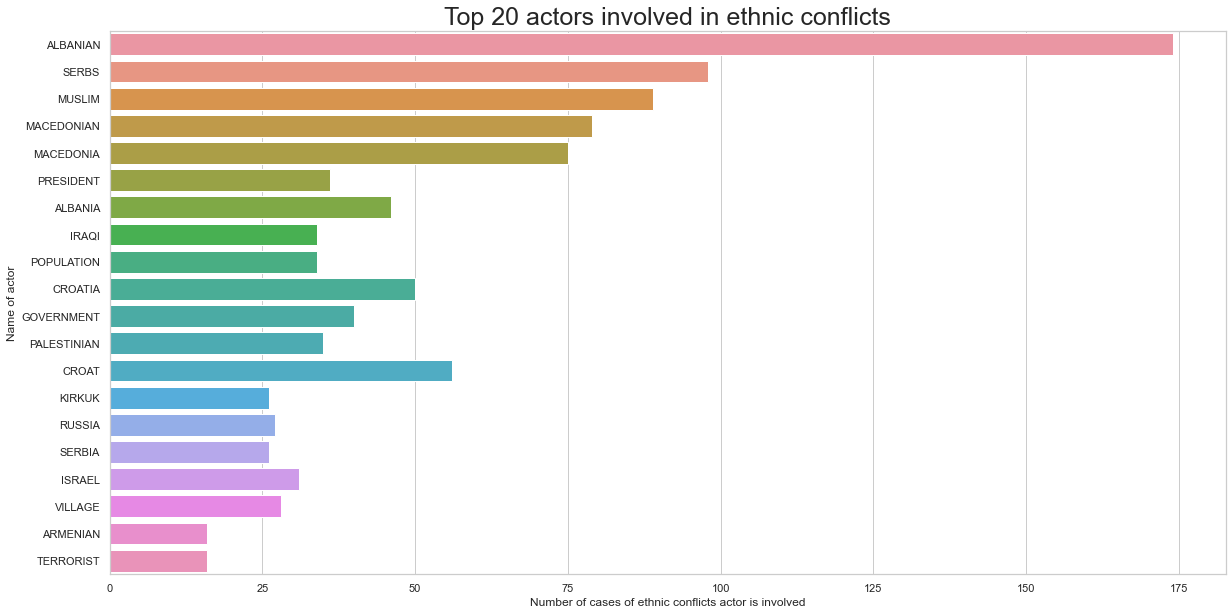

In [28]:
# Top 20 actors involved in ethnic conflicts
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20,10))
plt.title('Top 20 actors involved in ethnic conflicts', fontsize=25)
ax = sns.barplot(x='frequency', y='actors',data=comn.head(20), orient='h')
ax.set(xlabel='Number of cases of ethnic conflicts actor is involved', ylabel='Name of actor')

[Text(0.5, 0, 'Actor involved in n cases of ethnic conflicts'),
 Text(0, 0.5, 'Frequency')]

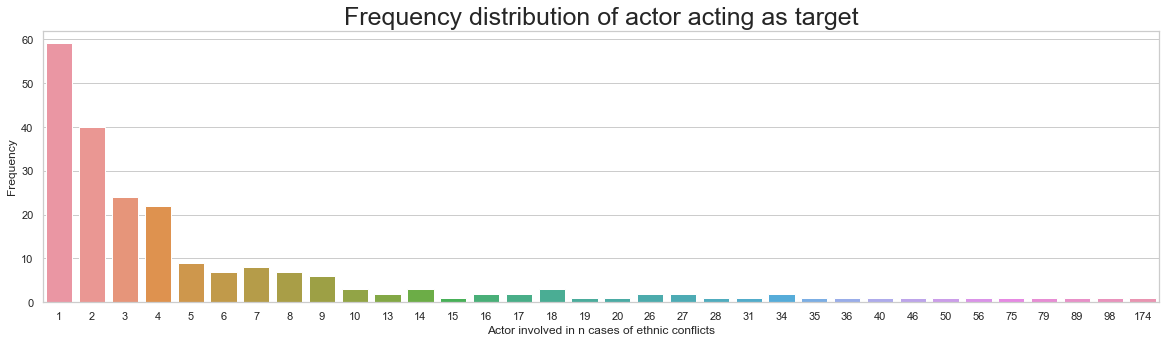

In [29]:
# Frequency distribution of actor acting as target
plt.figure(figsize=(20,5))
plt.title('Frequency distribution of actor acting as target', fontsize=25)
ax = sns.countplot(x='frequency', data=comn, orient='h')
ax.set(xlabel='Actor involved in n cases of ethnic conflicts', ylabel='Frequency')